In [1]:
# Dependencies and setup
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [2]:
# Import data
data= pd.read_csv('truncated_waittimes.csv', index_col='eruptionID')
data = data.dropna(how='any')
data.count()

geyser                 18592
eruption_time_epoch    18592
duration               18592
observer               18592
date                   18592
dur                    18592
waiting_min            18592
waiting_hr             18592
year                   18592
dtype: int64

In [4]:
# Create figure
fig = go.Figure(data=go.Scatter(x=data['waiting_min'],y=data['dur'], marker=dict(
        size=10,
        cmax=2020,
        cmin=1970,
        line=dict(color='DarkSlateGrey', width=0.5),
        color=data['year'],
        colorbar=dict(title="Colorbar Year"),
        colorscale="Portland"),
        mode="markers")) 

fig.update_xaxes(title= 'Waiting Time (minutes)')
fig.update_yaxes(title= 'Duration of Eruption (minutes)')
fig.update_yaxes(range=[0, 6])
fig.update_xaxes(range=[29, 115])
fig.update_layout(title= 'Waiting time vs. Duration 1970-2019')
fig.show()

In [20]:
# Drop irrelevant columns
data.drop(['geyser', 'eruption_time_epoch', 'observer', 'duration', 'date', 'waiting_hr', 'year'], inplace=True, axis=1, errors='ignore')
data.head()

,dur,waiting_min
eruptionID,,
23132,4.00,71
23133,1.50,50
23134,4.25,67
23135,4.00,81
23136,1.75,43


In [21]:
# Set number of clusters
# According to the literature there are 2-3 clusters
# starting with 2 clusters
kmeans = KMeans(n_clusters=2)

In [22]:
# Fit data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.score(data)

-1073410.9511416487

In [24]:
predicted_clusters = kmeans.predict(data)
predicted_clusters

array([0, 1, 0, ..., 0, 0, 0])

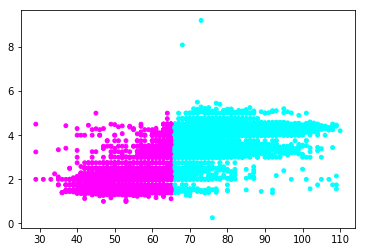

In [25]:
import matplotlib.pyplot as plt
y=data.iloc[:, 0]
X=data.iloc[:, 1]

plt.scatter(X, y, c=predicted_clusters, s=15, cmap='cool')
plt.show()

In [26]:
# 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
predicted_clusters = kmeans.predict(data)
predicted_clusters

array([0, 1, 0, ..., 2, 2, 2])

In [28]:
kmeans.score(data)

-495582.8447318476

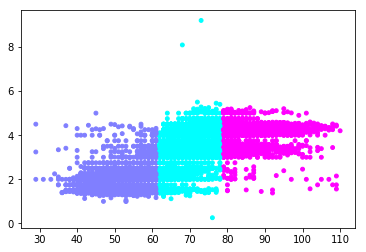

In [29]:
import matplotlib.pyplot as plt
y=data.iloc[:, 0]
X=data.iloc[:, 1]

plt.scatter(X, y, c=predicted_clusters, s=15, cmap='cool')
plt.show()

In [30]:
# 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
predicted_clusters = kmeans.predict(data)
predicted_clusters

array([2, 1, 2, ..., 3, 3, 3])

In [32]:
kmeans.score(data)

-320509.115515346

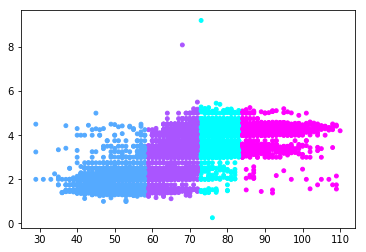

In [33]:
import matplotlib.pyplot as plt
y=data.iloc[:, 0]
X=data.iloc[:, 1]

plt.scatter(X, y, c=predicted_clusters, s=15, cmap='cool')
plt.show()